# Project: Wrangling and Analysis of 'WeRateDogs' tweet archive data

## Table of contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analysis">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook shows the data wrangling and analysis of tweet archive data of a popular dog rating page on Twitter called 'WeRateDogs'. It demonstrates gathering, assessment and cleaning of the data following different methods all as part of the data wrangling process. It also demonstrates the analysis of this data and documents the various insights and visualizations.

### Data description
The data to be used in this project includes:

#### 1. A file on hand containing tweet archive data including:

##### tweet_id: 
unique identifier of a particular Tweet.

##### in_reply_to_status_id:  
if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's ID.

##### in_reply_to_user_id:
if the represented Tweet is a reply, this field will contain the string representation of the original Tweet's author ID.

##### timestamp: 
the date and time at which the tweet was posted

##### source:
utility used to post the tweet as a HTML-formatted string

##### text: 
the actual UTF-8 text of the tweet.

##### retweeted_status_id:
if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet's ID

##### retweeted_status_user_id:
if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet's author ID

##### retweeted_timestamp:
the date and time at which the retweet was posted

##### expanded_urls: 
the full url link of the tweet

##### rating_numerator: 
the integer representation of the dog rating.

##### rating_denominator:
the integer representation of the overall value of the rating

##### name: 
the name of the dog

##### doggo: 
a big pupper usually older

##### floofer:
label given  to a dog that is excessively fury

##### pupper:
a small doggo, usually younger.

##### puppo:
a transitional phase between pupper and doggo

#### 2.  A tweet image file containing tweet image prediction data including:

##### tweet_id:
unique identifier of a particular Tweet.

##### jpg_url:
url link to the image associated with the given Tweet.
##### img_num:
since a tweet can have multiple images, this indicates the number of the image corresponding to the most confident prediction.
#####  p1:
p1 is the algorithm's #1 prediction for the image in the tweet
##### p1_conf:
p1_conf is how confident the algorithm is in its #1 prediction 
##### p1_dog:
p1_dog is whether or not the #1 prediction is a breed of dog 
#####  p2:
p2 is the algorithm's second most likely prediction
##### p2_conf:
p2_conf is how confident the algorithm is in its #2 prediction
##### p2_dog:
p2_dog is whether or not the #2 prediction is a breed of dog
#####  p3:
p3 is the algorithm's third most likely prediction
##### p3_conf:
p3_conf is how confident the algorithm is in its #3 prediction
##### p3_dog:
p3_dog is whether or not the #3 prediction is a breed of dog

#### 3. Tweet retweet count  and favorite count data including:

##### tweet_id:
unique identifier of a particular Tweet.
##### retweet_count:
the number of times a Tweet has been retweeted.
##### favorite_count:
the number of times a Tweet has been favorited.





In [1]:
#installing tweepy into the environment
!pip install tweepy

In [46]:
# importing all the packages that will be required.
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import re
import functools
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns



<a id='gathering'></a>
## Data Gathering

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [47]:
# reading twitter-archive-enhanced.csv into a dataframe
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# programmatically downloading the image_predictions.tsv file
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
#saving the contents to the computer
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [48]:
image_df = pd.read_csv('image_predictions.tsv', sep = '\t')
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#api
api_key = "YOU API KEY HERE"
api_secrets = "YOUR API SECRET KEY HERE"
access_token = "YOUR ACCESS TOKEN KEY HERE"
access_secret = "YOUR ACCESS TOKEN SECRET HERE"
 
# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_secret)
 
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
#create list of tweet ids from archive_df tweet_id column
tweet_ids = []
for id in tweet_archive.tweet_id:
    tweet_ids.append(str(id))

In [10]:
print(len(tweet_ids))

2356


In [7]:
#create empty list for available tweets
tweets = []
#create empty list for unavailable tweets
unavailable_tweets = []
#gather each tweet's json data by id
for id in tweet_ids:
    try:
        tweet = (api.get_status(id))._json
        tweets.append({'tweet_id':tweet['id'],'retweet_count':tweet['retweet_count'],'favorite_count':tweet['favorite_count']})
    except:
        unavailable_tweets.append(id)
        
indices = list(range(len(tweets)))
with open('tweet_json.txt', mode = 'w') as file:
    for i in indices
        file.write(json.dumps(tweets[i]['tweet_id']))
        file.write('\t')    
        file.write(json.dumps(tweets[i]['retweet_count']))
        file.write('\t')
        file.write(json.dumps(tweets[i]['favorite_count']))
        file.write('\n')
    
        
           

Rate limit reached. Sleeping for: 743
Rate limit reached. Sleeping for: 743


In [34]:
# check for available attributes of the json data retrieved from the api
list(tweet.keys())

['created_at',
 'id',
 'id_str',
 'text',
 'truncated',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang']

In [49]:
#reading the 'tweet_json.txt' file into a dataframe
tweet_counts = pd.read_csv('tweet_json.txt', sep ='\t', header = None, names = ['tweet_id', 'retweet_count','favorite_count'])
tweet_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5280,29255
2,891815181378084864,3466,21987
3,891689557279858688,7198,36823
4,891327558926688256,7723,35207


In [9]:
tweet_counts.shape

(2326, 3)

<a id='assessing'></a>
## Assessing Data
#### 1. tweet_archive dataframe

In [22]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1062,741099773336379392,NaN,NaN,2016-06-10 02:48:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ted. He's given up. 11/10 relatable af...,NaN,NaN,NaN,https://vine.co/v/ixHYvdxUx1L,11,10,Ted,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1305,707387676719185920,NaN,NaN,2016-03-09 02:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarkus. He's a Skinny Eastern Worcesters...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707387676...,10,10,Clarkus,None,None,None,None
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None


In [24]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweet_archive.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
5,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
6,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [13]:
tweet_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [14]:
tweet_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Buddy          7
Daisy          7
Toby           7
Scout          6
Dave           6
Jack           6
Oscar          6
Bella          6
Koda           6
Jax            6
Rusty          6
Milo           6
Leo            6
Stanley        6
Chester        5
            ... 
Thor           1
Rueben         1
by             1
Jeremy         1
Bobble         1
Liam           1
Stella         1
General        1
Cheryl         1
Lilli          1
Travis         1
Berkeley       1
Banditt        1
Ralphie        1
Dixie          1
Grizzwald      1
Strudel        1
Orion          1
Kona           1
Lupe           1
Ace            1
Zuzu           1
Chloe          1
Remy           1
Rufio          1
Vinscent       1
Sprinkles      1
Eevee         

In [50]:
words = []
for n in tweet_archive.name:
    if n[0].islower():
        words.append(n)
        
other_words = list(np.unique(words))
print(other_words)

['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']


In [5]:
tweet_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [6]:
tweet_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
sum(tweet_archive.duplicated())

0

#### 2. image_df dataframe

In [40]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [41]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False


In [42]:
sum(image_df.duplicated())

0

In [43]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#checking for non-original tweets' tweet ids in the image_df dataframe.

In [7]:
img_list = (list(image_df.tweet_id))

In [8]:
#takes approximately 30 mins
#create empty list for unoriginal tweets
unoriginal_tweets = []
#create empty list for unavailable tweets
unavailable_tweets = []
#create empty list for original tweets
original_tweets = []
#gather each tweet's json data by id
for id in img_list:
    try:
        img_tweet = (api.get_status(id))._json
        if pd.isna(img_tweet['in_reply_to_status_id']) is False or 'retweeted_status' in img_tweet.keys():
            unoriginal_tweets.append(id)
        elif pd.isna(img_tweet['in_reply_to_status_id']) is True and 'retweeted_status' not in img_tweet.keys():
            original_tweets.append(id)
    except:
        unavailable_tweets.append(id)

Rate limit reached. Sleeping for: 741
Rate limit reached. Sleeping for: 742


In [10]:
print(unoriginal_tweets)

[667550882905632768, 667550904950915073, 669353438988365824, 671729906628341761, 674754018082705410, 674793399141146624, 674999807681908736, 675349384339542016, 675707330206547968, 675870721063669760, 684225744407494656, 684538444857667585, 692142790915014657, 694356675654983680, 695767669421768709, 703425003149250560, 704871453724954624, 705786532653883392, 711998809858043904, 729838605770891264, 746818907684614144, 746906459439529985, 752309394570878976, 754874841593970688, 757597904299253760, 757729163776290825, 759159934323924993, 761371037149827077, 761750502866649088, 766078092750233600, 770093767776997377, 771171053431250945, 772615324260794368, 775898661951791106, 776819012571455488, 777641927919427584, 778396591732486144, 780476555013349377, 780496263422808064, 782021823840026624, 783347506784731136, 786036967502913536, 788070120937619456, 790723298204217344, 791026214425268224, 793614319594401792, 794355576146903043, 794983741416415232, 796177847564038144, 798340744599797760,

In [9]:
print(unavailable_tweets)

[680055455951884288, 754011816964026368, 759566828574212096, 759923798737051648, 771004394259247104, 779123168116150273, 802247111496568832, 829374341691346946, 837012587749474308, 837366284874571778, 842892208864923648, 844704788403113984, 851861385021730816, 851953902622658560, 861769973181624320, 872261713294495745, 873697596434513921, 888202515573088257]


#### 3. tweet_counts dataframe

In [46]:
tweet_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5280,29255
2,891815181378084864,3466,21987
3,891689557279858688,7198,36823
4,891327558926688256,7723,35207


In [47]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id          2326 non-null int64
retweet_count     2326 non-null int64
favorite_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [48]:
tweet_counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417480e+17,2457.867154,7018.926913
std,6.818802e+16,4166.197661,10908.789726
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,492.250000,1219.500000
50%,7.178159e+17,1145.500000,3040.500000
75%,7.986402e+17,2843.500000,8562.750000
max,8.924206e+17,70429.000000,144312.000000


In [49]:
sum(tweet_counts.duplicated())

0

In [7]:
all_columns = pd.Series(list(tweet_archive) + list(tweet_counts) + list(image_df))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

### Quality issues
#### `tweet_archive table`

1. 'name', 'doggo', 'floofer', 'pupper' and 'puppo' columns have missing values misrepresented as strings('None')

2. 'name' column has non-valid words (adjectives,articles,adverbs) as values in some entries

3. 'name', 'doggo', 'floofer', 'pupper' and 'puppo' columns have missing values.

4. presence of some records with non null values in the 'retweeted_status_id' column,these are not original tweets

5. presence of some records with non null values in 'reply_to_status_id' column, these are not original tweets

6. records dating beyond 2017-08-01

7. 'time_stamp' column is an object datatype

#### `image_df table`

8. records with 'false' values in all 3 of the dog prediction columns (p1_dog, p2_dog, p3_dog),these are not dogs
9. non-original tweet records




### Tidiness issues
1. doggo,pupper,puppo,floofer are represented as different column headers instead of individual values of one column(tweet_archive  table)

2. dog breeds are spread out in separate columns(image_df table)

3. data is in separate tables.

<a id='cleaning'></a>
## Cleaning Data

In [109]:
# Make copies of original pieces of data
tweetarch_clean = tweet_archive.copy()
img_clean = image_df.copy()
tweetcounts_clean = tweet_counts.copy()

### Quality issue #1:
#### tweet_archive table:
#### 'name', 'doggo', 'floofer', 'pupper' and 'puppo' columns have missing values misrepresented as strings('None')

### Quality issue #2:
#### tweet_archive table:
#### 'name' column has non-valid words (adjectives,articles,adverbs) as values in some entries

#### Define: 
Use the .replace() function to replace the specified values from the assessment with null values.This fixes both issue 1 and 2.

#### Code:

In [110]:
other_words.append('None')
for word in other_words:
    tweetarch_clean.replace(to_replace = word , value = np.nan, inplace = True)

#### Test:

In [53]:
tweetarch_clean.isnull().sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
623,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
889,False,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False,True
976,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
113,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True
639,False,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True
2036,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,True
574,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1412,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
1756,False,True,True,False,False,False,True,True,True,False,False,False,False,True,True,True,True
1707,False,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True


In [54]:
tweetarch_clean.name.value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
Penny      10
Lola       10
Bo          9
Winston     9
Sadie       8
Bailey      7
Toby        7
Buddy       7
Daisy       7
Stanley     6
Jax         6
Leo         6
Koda        6
Oscar       6
Bella       6
Dave        6
Rusty       6
Milo        6
Scout       6
Jack        6
Louis       5
George      5
Gus         5
Sammy       5
Phil        5
           ..
Blipson     1
Kara        1
Cuddles     1
Walker      1
Rorie       1
Lolo        1
Rontu       1
Asher       1
Gerbald     1
Dook        1
Todo        1
Brudge      1
Swagger     1
Rinna       1
Willy       1
Tupawc      1
Ember       1
Bradley     1
Eugene      1
Fido        1
Iggy        1
Pherb       1
Jeb         1
Monty       1
Tess        1
Chloe       1
Chuck       1
Tayzie      1
Aqua        1
Dug         1
Name: name, Length: 931, dtype: int64

In [111]:
tweetarch_clean.query(f'name == {other_words}')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issue #3:
#### tweet_archive table:
#### 'name', 'doggo', 'floofer', 'pupper' and 'puppo' columns have missing values.

#### Define: 
Use the values of the text column and regex methods to extract the required values for these columns

#### Code:

In [112]:
#create a function to find and replace null values in the dog stages

def fill_dog_stage(stage):
    
    '''loops through all the values of the specified column,searches for null values, which if True,
    loops through the corresponding values of the text column, searches for the appropriate value and replaces this value
    into the specified position'''
    
    indices = list(range(len(tweetarch_clean[stage])))
    for i in indices:
        if pd.isna(tweetarch_clean[stage][i]):
            try:
                 tweetarch_clean.loc[i,stage] = re.findall(stage,tweetarch_clean.text[i])[0]
            except:
                tweetarch_clean.loc[i,stage] = np.nan

In [113]:
#create a list of the dog stages loop through each one, passing to the function

stages = ['pupper','puppo','doggo','floofer']

for stage in stages:
    fill_dog_stage(stage)


#### Test:

In [114]:
tweetarch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         107 non-null object
floofer                       10 non-null object
pupper                        281 non-null object
puppo                         38 non-null object
dtypes: float64(4), int64(3), object(1

### Tidiness issue #1: 
#### tweet_archive table:
#### doggo,pupper,puppo,floofer are represented as different column headers instead of individual values of one column

#### Define:
Create a new column for dog stages and loop through each of these columns for appropriate values for the dog stage column to unpivot the three columns. Drop the three columns when done.

#### Code

In [115]:
dog_stages = [] #doggo,floofer,pupper,puppo
indices = list(range(len(tweetarch_clean)))
for i in indices:
    if not pd.isna(tweetarch_clean.floofer[i]):
        dog_stages.append('floofer')
    elif not pd.isna(tweetarch_clean.puppo[i]):
        dog_stages.append('puppo')
    elif not pd.isna(tweetarch_clean.pupper[i]):
        dog_stages.append('pupper')
    elif not pd.isna(tweetarch_clean.doggo[i]):
        dog_stages.append('doggo')
    else:
        dog_stages.append(np.nan)

In [116]:
tweetarch_clean['dog_stage'] = dog_stages

In [117]:
tweetarch_clean = tweetarch_clean.drop(['pupper','doggo','puppo','floofer'], axis = 1)

#### Test

In [118]:
tweetarch_clean.dog_stage.value_counts()

pupper     281
doggo       92
puppo       38
floofer     10
Name: dog_stage, dtype: int64

Note that some records had values for either both doggo & pupper, doggo & puppo and  doggo & floofer.For streamlining purposes, one had to be chosen over the other, hence the slight changes in some of the dog stage value counts. I chose the other stages over 'doggo', placing it last in the loop statement because this term is generally used more loosely relative to the rest, as per my personal judgement.

In [119]:
tweetarch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Quality issue #9:
#### image_df table:
#### non-original tweet records

#### Define:
Delete all the non-original tweets using the original_tweets ids list and vectorization.

#### Code:

In [120]:
for id in img_clean.tweet_id:
    if id not in original_tweets:
        img_clean.drop(img_clean[img_clean['tweet_id'] == id].index, inplace = True)

In [124]:
#reset the index
img_clean.reset_index(inplace = True)

#### Test:

In [125]:
#should evaluate to True
list(img_clean.tweet_id) == original_tweets

True

### Tidiness issue #2:
####  image_df table:
#### dog breeds are spread out in separate columns

### Quality issue#8:
####  image_df table:
#### records with 'false' values in all 3 of the dog prediction columns (p1_dog, p2_dog, p3_dog),these are not dogs

#### Define:
Create a new column for dog breeds and use the p and p_dog columns to populate the column, then drop all rows with null values in the dog breeds column. This also takes care of issue `#8`
Then drop the columns that will no longer be needed.

#### Code:

In [126]:
breeds = []
indices = list(range(len(img_clean.tweet_id)))
for i in indices:
    if img_clean.p1_dog[i]:
        breeds.append(img_clean.p1[i])
    elif img_clean.p2_dog[i]:
        breeds.append(img_clean.p2[i])
    elif img_clean.p3_dog[i]:
        breeds.append(img_clean.p3[i])
    else:
        breeds.append(np.nan)

In [127]:
img_clean['dog_breed'] = breeds

In [128]:
img_clean.dropna(inplace = True)

In [129]:
img_clean = img_clean.drop(["img_num",'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1)

#### Test:

In [130]:
img_clean.columns

Index(['index', 'tweet_id', 'jpg_url', 'dog_breed'], dtype='object')

### Quality issue #4:
#### tweet_archive table:
#### presence of some records with non null values in the 'retweeted_status_id' column,these are not original tweets


### Quality issue #5:
#### tweet_archive table:
#### presence of some records with non null values in 'reply_to_status_id' column, these are not original tweets

#### Define:
Filter out these records using boolean indexing. Afterwards drop associated columns and any other columns that will not be further used.

#### Code:

In [131]:
tweetarch_clean = tweetarch_clean.loc[pd.isna(tweetarch_clean['in_reply_to_status_id'])]

In [132]:
tweetarch_clean = tweetarch_clean.loc[pd.isna(tweetarch_clean['retweeted_status_id'])]

#### Test:

In [133]:
tweetarch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
dog_stage                     372 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 245.7+ KB


#### Code:

In [134]:
tweetarch_clean = tweetarch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls',], axis = 1 )

#### Test:

In [135]:
tweetarch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             372 non-null object
dtypes: int64(3), object(4)
memory usage: 131.1+ KB


### Tidiness issue #3: 
#### Data is in separate tables

#### Define:
Merge the three dataframes on the tweet_id column to make one master dataframe.

#### Code:

In [136]:
data_frames = [img_clean,tweetarch_clean,tweetcounts_clean]
master_df = functools.reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='left'), data_frames)

#### Test:

In [29]:
master_df

,tweet_id,jpg_url,dog_breed,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,NaN,NaN,421.0,2285.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,NaN,39.0,112.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9.0,10.0,NaN,NaN,36.0,100.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,NaN,115.0,245.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,36.0,88.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,10.0,10.0,NaN,NaN,50.0,115.0
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,10.0,10.0,NaN,NaN,196.0,367.0
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,NaN,NaN,112.0,247.0
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,8.0,10.0,NaN,NaN,47.0,99.0
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Ve...,10.0,10.0,NaN,NaN,180.0,395.0


### Issue #6:
#### records dating beyond 2017-08-01

### Issue #7:
#### 'timestamp' column is an object datatype


#### Define:
Merging the data sets filters out all records dating beyond 2017-08-01, fixing issue`#6`.This also means that issue`#7` is now a non-issue because the column will be dropped, as the main reason for converting it's data type would have been to filter out the records that dated beyond the specified date.

#### Code:

In [137]:
master_df = master_df.drop(['timestamp'], axis = 1)

#### Test:

In [138]:
master_df.columns

Index(['index', 'tweet_id', 'jpg_url', 'dog_breed', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count'],
      dtype='object')

## Storing Data

In [139]:
# storing the cleaned master dataframe in a csv file
master_df.to_csv('twitter_archive_master.csv',index=False) 

<a id='analysis'></a>
## Analyzing and Visualizing Data


### Questions for analysis

1. What is the lowest dog rating on WeRateDogs?
2. Which tweet has the lowest dog rating on WeRateDogs?
3. Which tweet has the highest retweet count?
4. What are some of the most common dog names?
5. What are the most popular dog breeds by favorite count?
6. Are WeRateDogs tweets more likely to be favorited or retweeted?
7. Describe the correlation between retweet count and favorite count.
8. Describe the correlation between dog rating and retweet count.
9. Describe the correlation between dog rating and favorite count.


In [140]:
# importing data into a dataframe
tweets = pd.read_csv('twitter_archive_master.csv')


In [141]:
# cheching summary statistics for the data
tweets.describe()

,index,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1658.000000,1.658000e+03,1658.000000,1658.000000,1657.000000,1657.000000
mean,1048.162847,7.392385e+17,11.385404,10.471049,2283.746530,8004.847314
std,594.020413,6.794971e+16,7.506534,6.359152,4158.936293,11787.806358
min,0.000000,6.660209e+17,0.000000,2.000000,11.000000,66.000000
25%,548.250000,6.773835e+17,10.000000,10.000000,514.000000,1806.000000
50%,1049.500000,7.138309e+17,11.000000,10.000000,1131.000000,3723.000000
75%,1552.750000,7.931619e+17,12.000000,10.000000,2587.000000,9904.000000
max,2073.000000,8.921774e+17,165.000000,150.000000,70429.000000,144312.000000


In [142]:
#checking the denominator values
tweets.rating_denominator.value_counts()

10     1642
50        3
80        2
11        2
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

Since the values of the denominator vary, to standardize the ratings for analysis, create an additional percentage column

In [143]:
#creating a percentage rating column
tweets['rating'] = (tweets.rating_numerator / tweets.rating_denominator)* 100

### Insights:

##### 1. What is the lowest dog rating on WeRateDogs? 

In [144]:
tweets.rating.min()

0.0

The lowest dog rating given on WeRateDogs is 0.

##### 2. Which tweet has the lowest dog rating on WeRateDogs?

In [146]:
#tweet with the lowest dog rating
tweets.loc[tweets.rating == tweets.rating.min()]

,index,tweet_id,jpg_url,dog_breed,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,rating
1455,1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,American_Staffordshire_terrier,When you're so blinded by your systematic plag...,0,10,NaN,NaN,2755.0,20923.0,0.0


In [147]:
# getting the tweet text
tweets.loc[tweets.rating == tweets.rating.min()].text[1455]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [148]:
#getting the tweet image url for download
tweets.loc[tweets.rating == tweets.rating.min()].jpg_url[1455]

'https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg'

The tweet with the lowest rating on WeRateDogs, at 0/10 is of an American Staffordshire terrier stating:

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10"
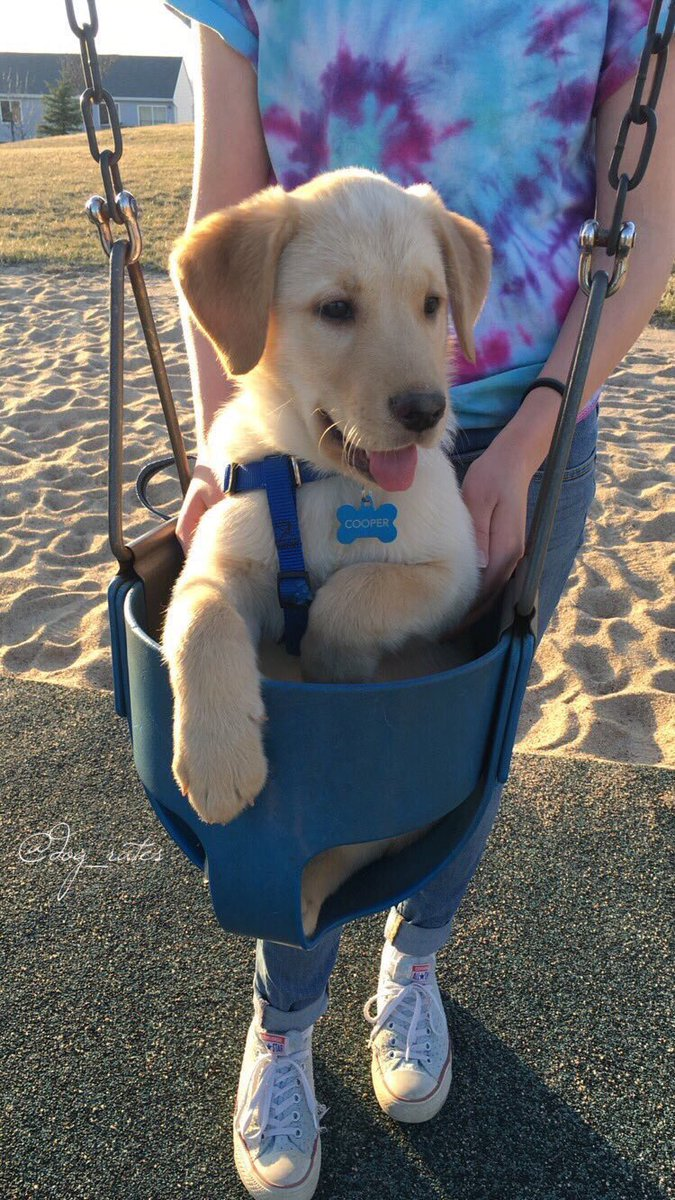

This tweet however still has a favorite count of 20,923 which is more than double the average favorite count, and a retweet count of 2,755 which is still slightly higher than the average retweet count.

##### 3. Which tweet has the highest retweet count?

In [149]:
#tweet with the highest retweet count
tweets.loc[tweets.retweet_count == tweets.retweet_count.max()]

,index,tweet_id,jpg_url,dog_breed,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,rating
978,1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,Here's a doggo realizing you can stand in a po...,13,10,NaN,doggo,70429.0,144312.0,130.0


In [150]:
#getting the tweet text
tweets.loc[tweets.retweet_count == tweets.retweet_count.max()].text[978]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [151]:
#getting the tweet image for downaload
tweets.loc[tweets.retweet_count == tweets.retweet_count.max()].jpg_url[978]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

The tweet with the highest retweet count at 70,429 retweets, also happening to have the highest favorite count at 144,312 likes, is of a Labrador retriever stating:

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af"
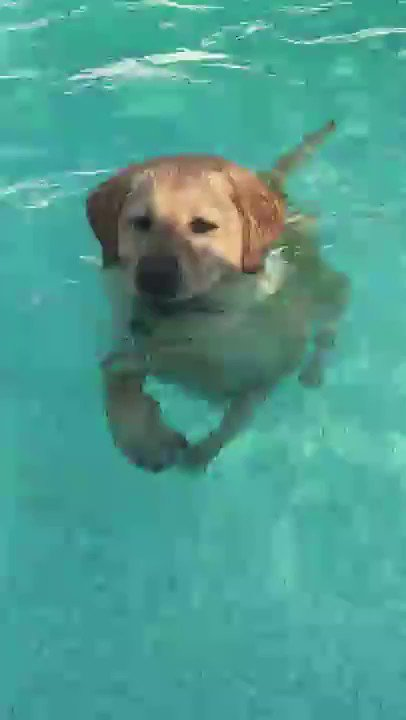

##### 4. What are some of  the most common dog names?

In [152]:
tweets.name.value_counts()

Cooper       10
Charlie       9
Lucy          9
Tucker        9
Oliver        9
Penny         8
Sadie         7
Daisy         7
Winston       7
Toby          6
Jax           6
Lola          6
Koda          6
Stanley       5
Bella         5
Oscar         5
Leo           5
Bo            5
Rusty         5
Bear          4
Gus           4
Larry         4
Louis         4
Winnie        4
Alfie         4
Duke          4
Brody         4
Maggie        4
Bentley       4
Cassie        4
             ..
Tayzie        1
Lipton        1
Aqua          1
Rocco         1
Clybe         1
Carll         1
Humphrey      1
Brownie       1
Jay           1
Asher         1
Brat          1
Lili          1
Eve           1
Ed            1
Grizz         1
Travis        1
Cheesy        1
Sage          1
Jockson       1
Hero          1
Antony        1
Buddah        1
Jarvis        1
Snickers      1
Bonaparte     1
Klevin        1
Betty         1
Cora          1
Bruno         1
Dug           1
Name: name, Length: 830,

Some of the most common dog names on WeRateDogs include Cooper at the very top, with 10 dogs, Charlie, Lucy, Tucker, Oliver. Each having 9 dogs with the stated names and Penny having 8 dogs.

##### 5. What are the most popular dog breeds by favorite count?

In [153]:
tweets.groupby('dog_breed').favorite_count.sum().sort_values(ascending = False)

dog_breed
golden_retriever             1639666.0
Labrador_retriever           1028020.0
Pembroke                      902671.0
Chihuahua                     664894.0
French_bulldog                524718.0
Samoyed                       480684.0
chow                          388436.0
cocker_spaniel                351165.0
pug                           324429.0
malamute                      303845.0
toy_poodle                    274019.0
Pomeranian                    273973.0
Chesapeake_Bay_retriever      265152.0
Eskimo_dog                    242658.0
Cardigan                      229040.0
German_shepherd               184672.0
Lakeland_terrier              182833.0
basset                        170964.0
miniature_pinscher            168423.0
Great_Pyrenees                157068.0
whippet                       139361.0
standard_poodle               131277.0
Shetland_sheepdog             130964.0
Bedlington_terrier            128905.0
Staffordshire_bullterrier     128875.0
English_springe

The top 5 most popular dog breeds on WeRateDogs in descending order are:

1.Golden retrievers having 1,639,666 total favorite counts

2.Labrador retrievers at 1,028,020 favorite counts

3.Pembrokes at 902,671 favorite counts

4.Chihuahuas at 664,894 favorite counts

5.French Bulldogs at 524,718 favorite counts


##### 6. Are WeRateDogs tweets more likely to be retweeted or favorited?

In [154]:
print(f'Total number of retweets: {tweets.retweet_count.sum()}') 
print(f'Total number of likes: {tweets.favorite_count.sum()}')
print(f'Difference: {tweets.favorite_count.sum()-tweets.retweet_count.sum()}')

Total number of retweets: 3784168.0
Total number of likes: 13264032.0
Difference: 9479864.0


WeRateDogs tweets are more likely to be favorited, having 9.4 million more favorite counts than retweet counts.

### Visualizations

##### 1. Describe the correlation between retweet count and favorite count.

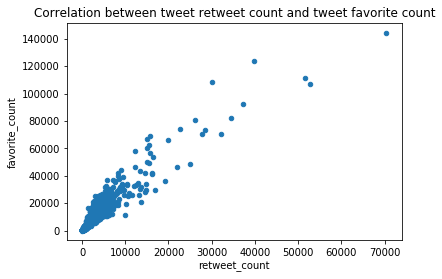

In [155]:
#plotting to show correlation
tweets.plot(x = 'retweet_count',y = 'favorite_count', kind = 'scatter');
plt.title('Correlation between tweet retweet count and tweet favorite count');


There is generally a positive correlation between retweet count and favorite count. As a tweet's favorite count increases, the number of retweets is also highly likely to increase.

##### 2. Describe the correlation between dog rating and retweet count

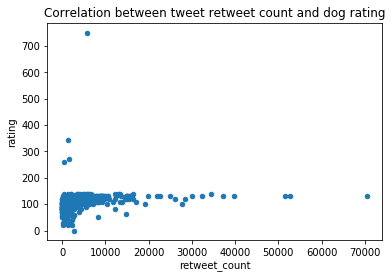

In [156]:
tweets.plot(x = 'retweet_count',y = 'rating', kind = 'scatter');
plt.title('Correlation between tweet retweet count and dog rating');

The scatter plot reveals a horizontal line of best fit, indicating there is no correlation between dog rating and retweet count. The rating given to a dog therefore does not affect the number of times a particular dog's tweet will be retweeted.

##### 3. Describe the correlation between dog rating and favorite count.

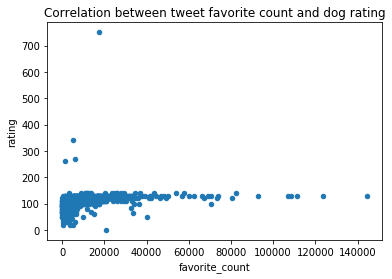

In [157]:
tweets.plot(x = 'favorite_count',y = 'rating', kind = 'scatter');
plt.title('Correlation between tweet favorite count and dog rating');

Much like with retweet count, this scatter plot also reveals a horizontal line of best fit, indicating, there is no correlation between dog rating and favorite count. The rating given to a dog therefore does not affect the number of times that the particular dog's tweet will be favorited.